In [1]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter

/Users/alexrubin/code/Plots_for_CQED_simulation_error_mitigation/.venv/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


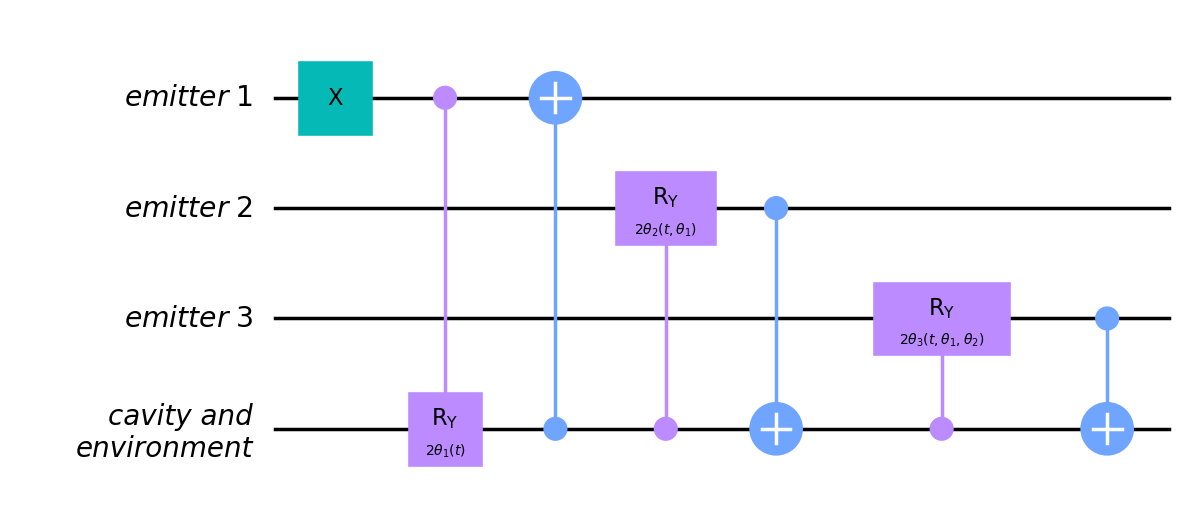

In [2]:
qr1 = QuantumRegister(1, 'emitter 1')
qr2 = QuantumRegister(1, 'emitter 2')
qr3 = QuantumRegister(1, 'emitter 3')
qr4 = QuantumRegister(1, '')  # placeholder; see below

circuit = QuantumCircuit(qr1, qr2, qr3, qr4)
circuit.x(0)

theta_1 = Parameter(r'$2\theta_1(t)$')
circuit.cry(theta_1, 0, 3)
circuit.cx(3, 0)

theta_2 = Parameter(r'2$\theta_2(t, \theta_1)$')
circuit.cry(theta_2, 3, 1)
circuit.cx(1, 3)

theta_n = Parameter(r'2$\theta_3(t, \theta_1, \theta_2)$')
circuit.cry(theta_n, 3, 2)
circuit.cx(2, 3)

# circuit.measure_all()

fig, ax = plt.subplots(figsize=(12, 6))
circuit.draw(output="mpl", ax=ax, scale=3)

# Qiskit has an issue creating qubit labels that contain linebreaks.
# The linebreak renders, but the label is wrapped in ${}$.
# As a workaround, we'll just manually insert the label for the
# qubit representing the "cavity and environment"

ax.text(
    0.2,
    -3.25,
    "cavity and\nenvironment",
    fontsize=20,
    color='black',
    fontstyle='italic',
    horizontalalignment='right',
    zorder=50,
    bbox=dict(facecolor='white', alpha=1, edgecolor='none'),
)

plt.tight_layout()

# there is some excess white margin on the left side of the figure once exported
# let's trim that off
pos = ax.get_position()
new_pos = [pos.x0 - 0.03, pos.y0,  pos.width, pos.height]
ax.set_position(new_pos)

In [3]:
fig.savefig("../figures/QMARINA_circuit_diagram.eps")